In [97]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from datetime import date
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("./MAIN_DATASET_spotify2023.csv")

encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", "streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

for i in range(len(data)):
    data["streams"][i] = data["streams"][i] / 1e6

# data_standarized
data

,released_day_of_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,195,141.381703,125,2,0,80,89,83,31,0,8,4
1,82,133.716286,92,3,0,71,61,74,7,0,10,4
2,181,140.003974,138,7,0,51,32,53,17,0,31,6
3,235,800.840817,170,0,0,55,58,72,11,0,11,15
4,138,303.236322,144,0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
947,307,91.473363,144,0,0,60,24,39,57,0,8,3
948,294,121.871870,166,8,0,42,7,24,83,1,12,6
949,307,73.513683,92,3,0,80,81,67,4,0,8,6
950,293,133.895612,97,3,0,82,67,77,8,0,12,5


Drop `bpm` and `key` columns from dataset; split the dataset.

In [98]:
data = data.drop(columns=['bpm', 'key'])
X = data.drop("streams", axis = 1)
y = data["streams"]

X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)


val_percent = (len(X_val)/(len(data)))*100
test_percent = (len(X_test)/(len(data)))*100
train_percent = (len(X_train)/(len(data)))*100
print(f"Percent of Train: {train_percent:.2f} ,Validation:{val_percent:.2f} and Test dataset:{test_percent:.2f} ")

Percent of Train: 59.98 ,Validation:19.96 and Test dataset:20.06 


# Linear Regression - w/o `bpm`, `key`

In [99]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

rmse = np.sqrt(np.mean((y_pred - y_val)**2))
mean = mean_squared_error(y_val, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 572.1835332654159, Mean squared error val:  327393.99574009527
Rmse: 554.8534650384329, Mean squared error train:  307862.36766515544


# MLPRegressor - w/o `bpm`, `key`

In [100]:
reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=42, max_iter=100, solver='sgd')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

rmse = np.sqrt(np.mean((y_pred - y_val)**2))
mean = mean_squared_error(y_val, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 582.9287636185801, Mean squared error val:  339805.9434538864
Rmse: 564.2885784084892, Mean squared error train:  318421.59972227365


# Polynomial regressor - w/o `bpm`, `key`

In [101]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train1 = reg.predict(X_train_poly)
y_val_train1 = reg.predict(X_val_poly)

rmse = np.sqrt(np.mean((y_val_train1 - y_val)**2))
mean = mean_squared_error(y_val, y_val_train1)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train1 - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train1)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 596.3356752047765, Mean squared error val:  355616.2375219367
Rmse: 537.3427031580723, Mean squared error train:  288737.1806372241


# SVM Regressor - w/o `bpm`, `key`

In [102]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_val)

rmse = np.sqrt(np.mean((y_pred - y_val)**2))
mean = mean_squared_error(y_val, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 617.7654755590613, Mean squared error val:  381634.18279271317
Rmse: 604.6675377175021, Mean squared error train:  365622.8311693469


# k-fold cross-validation

In [103]:
from sklearn.model_selection import cross_val_score, cross_validate

# Linear Regression - w/o `bpm`, `key`; k-fold Cross-Validation

In [104]:
reg = LinearRegression()
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")


3-folds validation
mean of 3-folds cross_validation: -566.8099620316904
----------
5-folds validation
mean of 5-folds cross_validation: -565.850999174537
----------
10-folds validation
mean of 10-folds cross_validation: -561.6244145395631
----------
5-folds cross_validate

r2: -0.009162409272608984
negative_mean_abs_error: -414.3173017540569


# MLPRegressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [105]:
reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=42, max_iter=100, solver='sgd')
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



3-folds validation
mean of 3-folds cross_validation: -566.1711025179494
----------
5-folds validation
mean of 5-folds cross_validation: -576.0248257355235
----------
10-folds validation
mean of 10-folds cross_validation: -569.5831822602732
----------
5-folds cross_validate

r2: -0.046083151907498766
negative_mean_abs_error: -415.5895301273248


# Polynomial regressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [106]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)
reg = LinearRegression()

for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



3-folds validation
mean of 3-folds cross_validation: -566.8099620316904
----------
5-folds validation
mean of 5-folds cross_validation: -565.850999174537
----------
10-folds validation
mean of 10-folds cross_validation: -561.6244145395631
----------
5-folds cross_validate

r2: -0.009162409272608984
negative_mean_abs_error: -414.3173017540569


# SVM Regressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [107]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")


3-folds validation
mean of 3-folds cross_validation: -606.0224856153683
----------
5-folds validation
mean of 5-folds cross_validation: -606.2535843601028
----------
10-folds validation
mean of 10-folds cross_validation: -602.461544911766
----------
5-folds cross_validate

r2: -0.1592250407330337
negative_mean_abs_error: -365.16244712726103


# Grid Search

In [115]:
from sklearn.model_selection import GridSearchCV
X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression - w/o `bpm`, `key`; 5-fold Cross-Validation; Grid Search

In [109]:
# useless
reg = LinearRegression()
parameters = {}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{}
LinearRegression()
-580.145320602718


# MLPRegressor - w/o `bpm`, `key`; k-fold Cross-Validation; Grid Search

In [110]:
reg = MLPRegressor(random_state=42)
parameters = {'max_iter' : [50,100,150,400,800],
              'solver':('lbfgs', 'sgd', 'adam'),
              'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)]}

grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'hidden_layer_sizes': (10, 5, 5), 'max_iter': 50, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(10, 5, 5), max_iter=50, random_state=42,
             solver='lbfgs')
-574.5316409201527


# SVM Regressor - w/o `bpm`, `key`; k-fold Cross-Validation; Grid Search

In [111]:
parameters = {'max_iter' : [50,100,150,400,800],
              'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'C': [10**i for i in range(1, 8)],
              'epsilon': [0.1**i for i in range(1, 8)]}
reg = SVR()
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf', 'max_iter': 100}
SVR(C=10, max_iter=100)
-581.9139086698899


# MLP - Grid Search hyperparameters

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = MLPRegressor(random_state=42, hidden_layer_sizes= (10, 5, 5), max_iter= 50, solver= 'lbfgs')
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_help)

mae = mean_absolute_error(y_help, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_help, y_pred)
print("\nR2:", r2)


Mean Absolute Error: 375.1205990000928

R2: -0.09726739350617719


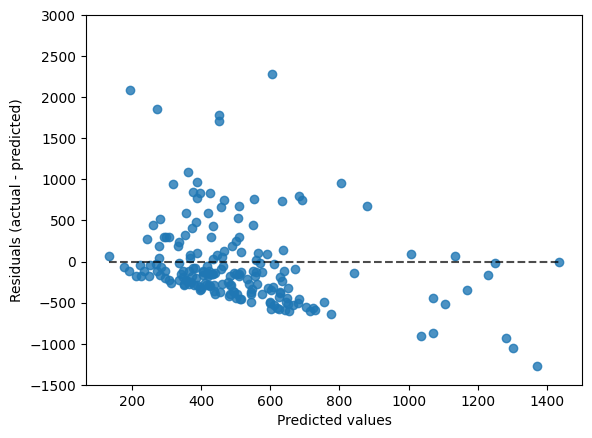

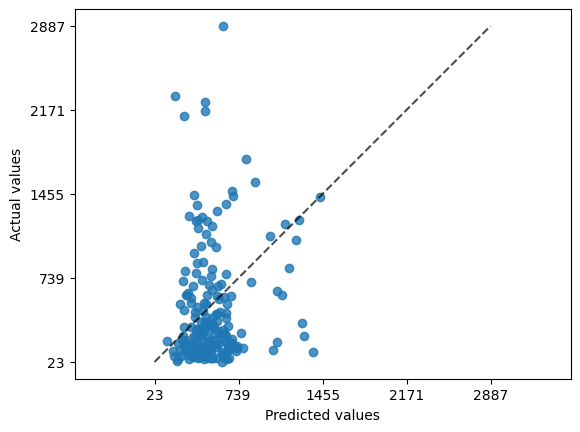

In [123]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, X_help, y_help, kind="residual_vs_predicted")
plt.ylim([-1500, 3000])

PredictionErrorDisplay.from_predictions(y_true=y_help, y_pred=y_pred, kind="actual_vs_predicted")

